<a href="https://colab.research.google.com/github/redwankarimsony/kaggle_notebooks/blob/main/Airbnb_Price_Prediction_(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Colab library to upload files to notebook
from google.colab import files
from IPython.display import clear_output

# Install Kaggle library
!pip install -q kaggle

# Upload the API Token file
uploaded = files.upload( )
clear_output()

In [3]:
!cp /content/kaggle.json /root/.kaggle/

In [5]:
%cd /content/
!kaggle datasets download -d kritikseth/us-airbnb-open-data

!unzip us-airbnb-open-data.zip
!rm us-airbnb-open-data.zip
!rm -r sample_data
!rm kaggle.json
clear_output()

In [7]:
import numpy as np 
import pandas as pd 


In [21]:
data = pd.read_csv('/content/AB_US_2020.csv')
data.head(50)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
5,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,14/01/20,0.49,1,294,Asheville
6,213006,Blue Gate West,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,1,137,30/11/19,1.35,1,0,Asheville
7,246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,3,57,30/10/19,0.53,2,106,Asheville
8,259576,"Private, peaceful, and free goat therapy",1362726,Julia,NaN,28805,35.61929,-82.48114,Entire home/apt,71,28,537,05/04/20,5.01,1,207,Asheville
9,295496,The Fern Street Apt near Biltmore,1501882,Debbie,NaN,28803,35.55537,-82.53539,Entire home/apt,50,90,31,14/06/19,0.29,1,339,Asheville


In [40]:
!pip install pyshp

from IPython.display import clear_output
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='whitegrid', palette='rocket', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
clear_output()

## City Information: 

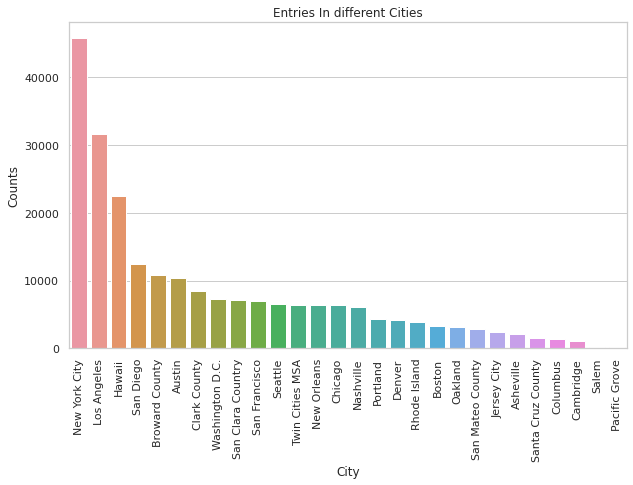

In [55]:
df_city = data.city.value_counts().reset_index()
df_city.columns = ['City', 'Counts']
ax = sns.barplot(x="City", y="Counts", data=df_city)
ax.set_xticklabels(figure.get_xticklabels(), rotation=90);
ax.set(title = 'Entries In different Cities');

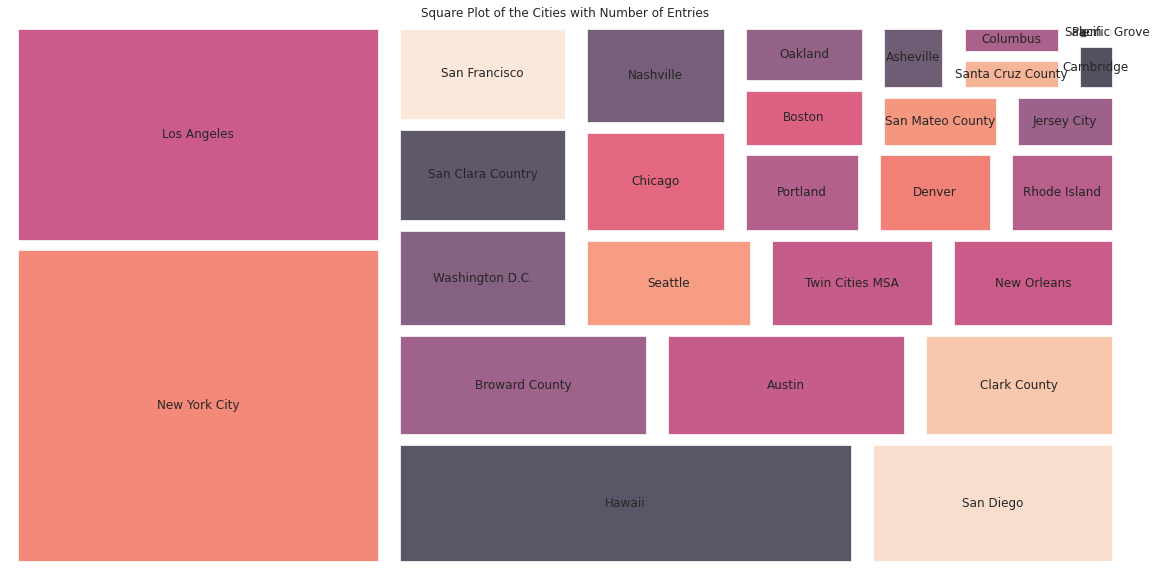

In [59]:
!pip install squarify
clear_output()

import squarify    #  (algorithm for treemap)
 
# If you have 2 lists
plt.figure(figsize=(20, 10))
squarify.plot(sizes=df_city['Counts'], label=df_city['City'], alpha=.7, pad = True,  )
plt.axis('off')
plt.title('Square Plot of the Cities with Number of Entries')
plt.show()

# Room Category Information 

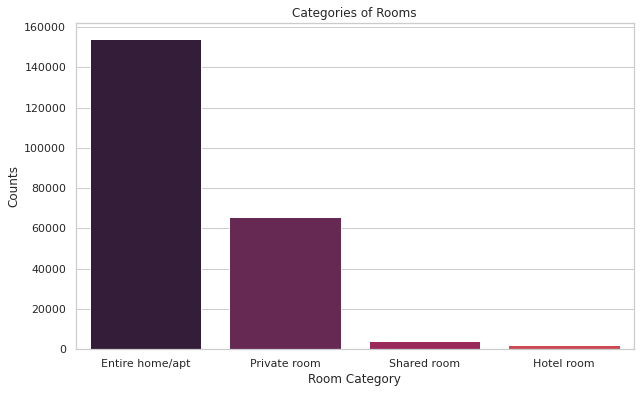

In [50]:
df = data['room_type'].value_counts().reset_index()
df.columns = ['room_type', 'counts']
ax = sns.barplot(x="room_type", y="counts", data=df)
ax.set(title = 'Categories of Rooms', xlabel="Room Category", ylabel = "Counts");

## Average Price vs Room Category

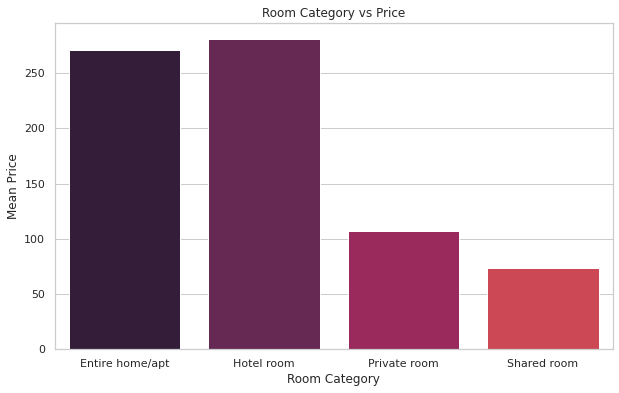

In [52]:
df = data.groupby(['room_type']).mean()['price'].reset_index().copy()
df.columns = ['room_type',  'mean_price']
ax = sns.barplot(x="room_type", y="mean_price", data=df)
ax.set(title = ' Average Price vs Room Category', xlabel="Room Category", ylabel = "Mean Price");

In [61]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


## Average Price vs City

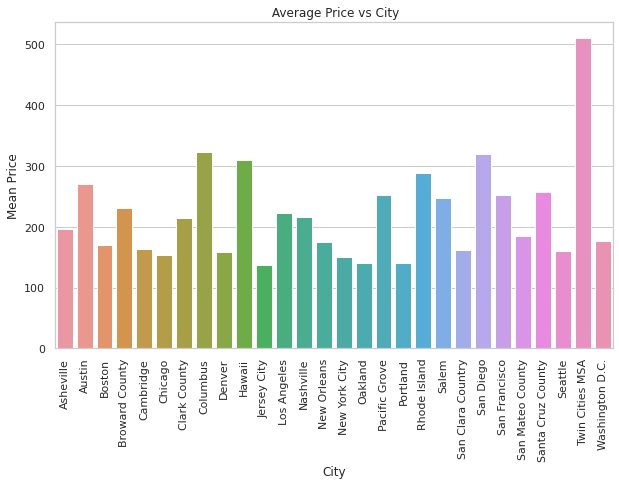

In [63]:
df = data.groupby(['city']).mean()['price'].reset_index().copy()
df.columns = ['city',  'mean_price']
ax = sns.barplot(x="city", y="mean_price", data=df)
ax.set(title = ' Average Price vs City', xlabel="City", ylabel = "Mean Price");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Average Review vs City

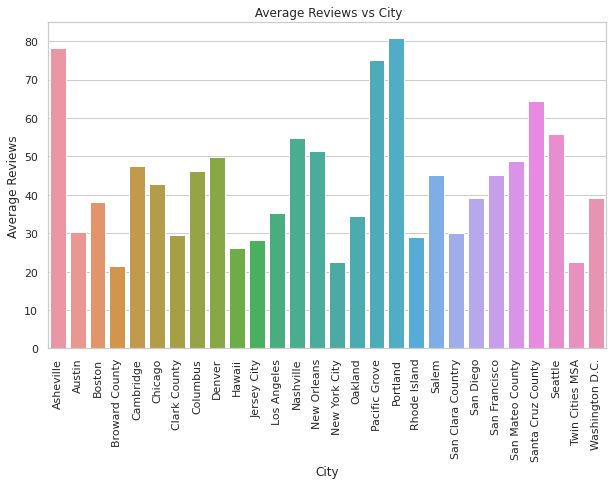

In [64]:
df = data.groupby(['city']).mean()['number_of_reviews'].reset_index().copy()
df.columns = ['city',  'reviews']
ax = sns.barplot(x="city", y="reviews", data=df)
ax.set(title = ' Average Reviews vs City', xlabel="City", ylabel = "Average Reviews");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Average Review vs House Category

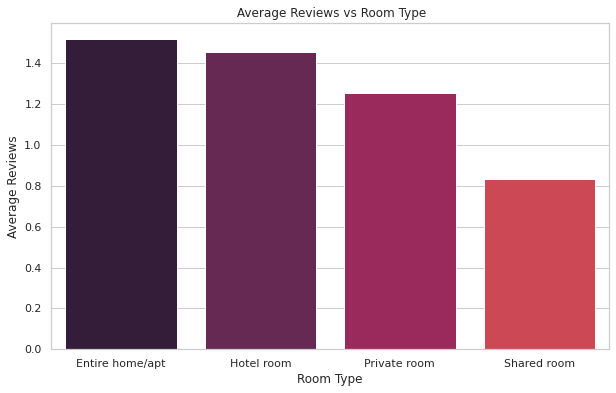

In [71]:
df = data.groupby(['room_type']).mean()['reviews_per_month'].reset_index().copy()
df.columns = ['room_type',  'reviews']
ax = sns.barplot(x="room_type", y="reviews", data=df)
ax.set(title = ' Average Reviews vs Room Type', xlabel="Room Type", ylabel = "Average Reviews");

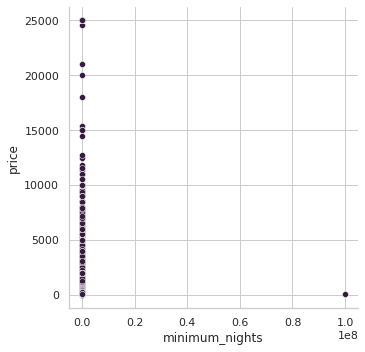

In [75]:
sns.relplot(x="minimum_nights", y="price", data=data);

In [76]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.
